# Single Layer LSTM

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXUT5MS/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXUT5MS/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXUT5MS/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = train_dataset, test_dataset 

In [ ]:
import numpy as np
np.array(train_data)

array(<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
      dtype=object)

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))



In [ ]:
train_dataset

<DatasetV1Adapter shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
tokenizer.vocab_size

8185

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 561,089
Trainable params: 561,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 91s 233ms/step - loss: 0.6933 - accuracy: 0.5024 - val_loss: 0.6929 - val_accuracy: 0.5024
Epoch 2/10
391/391 [==============================] - 90s 231ms/step - loss: 0.6998 - accuracy: 0.4976 - val_loss: 0.6926 - val_accuracy: 0.5027
Epoch 3/10
391/391 [==============================] - 91s 232ms/step - loss: 0.6911 - accuracy: 0.5061 - val_loss: 0.6924 - val_accuracy: 0.5031
Epoch 4/10
391/391 [==============================] - 90s 230ms/step - loss: 0.6896 - accuracy: 0.5006 - val_loss: 0.6930 - val_accuracy: 0.5030
Epoch 5/10
391/391 [==============================] - 90s 230ms/step - loss: 0.6874 - accuracy: 0.5057 - val_loss: 0.6944 - val_accuracy: 0.5030
Epoch 6/10
391/391 [==============================] - 88s 225ms/step - loss: 0.6866 - accuracy: 0.5051 - val_loss: 0.6939 - val_accuracy: 0.5035
Epoch 7/10
391/391 [==============================] - 88s 224ms/step - loss: 0.6861 - accuracy: 0.5002 - val_loss: 0.6950 - val_ac

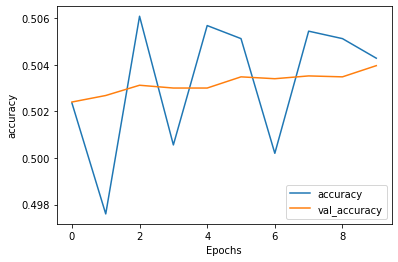

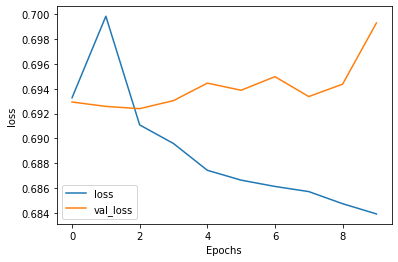

In [ ]:

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


In [ ]:
## 학습률이 너무 안 좋아서 점점 늘려나갈거야 양쪽 넣기
model2 = tf.keras.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
NUM_EPOCHS= 10
history2 = model2.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 166s 424ms/step - loss: 0.5503 - accuracy: 0.7218 - val_loss: 0.4491 - val_accuracy: 0.8068
Epoch 2/10
391/391 [==============================] - 164s 420ms/step - loss: 0.4045 - accuracy: 0.8272 - val_loss: 0.4167 - val_accuracy: 0.8244
Epoch 3/10
391/391 [==============================] - 165s 421ms/step - loss: 0.2836 - accuracy: 0.8895 - val_loss: 0.4325 - val_accuracy: 0.8096
Epoch 4/10
391/391 [==============================] - 163s 418ms/step - loss: 0.2308 - accuracy: 0.9120 - val_loss: 0.4015 - val_accuracy: 0.8379
Epoch 5/10
391/391 [==============================] - 162s 415ms/step - loss: 0.1868 - accuracy: 0.9310 - val_loss: 0.4516 - val_accuracy: 0.8210
Epoch 6/10
391/391 [==============================] - 160s 410ms/step - loss: 0.3800 - accuracy: 0.8322 - val_loss: 0.5554 - val_accuracy: 0.7440
Epoch 7/10
391/391 [==============================] - 160s 410ms/step - loss: 0.2332 - accuracy: 0.9123 - val_loss: 0.5121 -

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 697,025
Trainable params: 697,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
NUM_EPOCHS= 10
history3 = model3.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 323s 825ms/step - loss: 0.5585 - accuracy: 0.7092 - val_loss: 0.5262 - val_accuracy: 0.7501
Epoch 2/10
391/391 [==============================] - 316s 808ms/step - loss: 0.4155 - accuracy: 0.8198 - val_loss: 0.5997 - val_accuracy: 0.6565
Epoch 3/10
391/391 [==============================] - 310s 794ms/step - loss: 0.3594 - accuracy: 0.8503 - val_loss: 0.5088 - val_accuracy: 0.7593
Epoch 4/10
391/391 [==============================] - 313s 800ms/step - loss: 0.3758 - accuracy: 0.8431 - val_loss: 0.4542 - val_accuracy: 0.8132
Epoch 5/10
391/391 [==============================] - 315s 806ms/step - loss: 0.2752 - accuracy: 0.8941 - val_loss: 0.5320 - val_accuracy: 0.7842
Epoch 6/10
391/391 [==============================] - 313s 801ms/step - loss: 0.2467 - accuracy: 0.9082 - val_loss: 0.4446 - val_accuracy: 0.8423
Epoch 7/10
391/391 [==============================] - 314s 802ms/step - loss: 0.1989 - accuracy: 0.9268 - val_loss: 0.4638 -

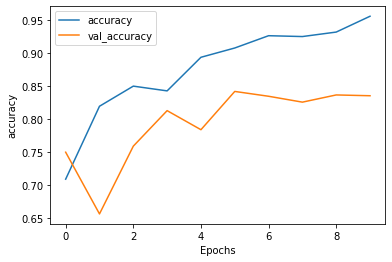

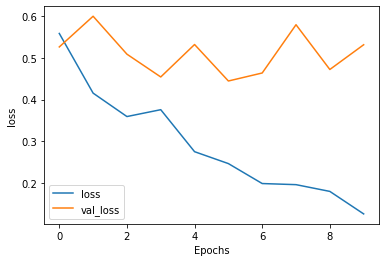

In [ ]:

plot_graphs(history3, 'accuracy')
plot_graphs(history3, 'loss')